In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5A1M5l2ygvhgILvUSI6SJmYua5fHDuN_2ElNFUAcqKcIRlfL-Ma1A4/1AY0e-g5A1M5l2ygvhgILvUSI6SJmYua5fHDuN_2ElNFUAcqKcIRlfL-Ma1A


<h3><b>Introduction</b></h3>
<p> The goal of this project is to take the publically available Beijing weather data from 2013 to 2017 and apply Time Series techniques to see if we can predict the amount of PM2.5 concentration in the air given other environmental features. This is a project I am working on during my free time applying some of the machine learning algorithms I have learned. I hope to come up with a predictive model with a high accuracy and a very low Root Mean Square Error (RMSE).</p>
<br>
<h5><b>Dataset Information</b></h5>
<p>This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.</p>
<br>
<h5><b>Project workflow</b></h5>
<p>This project utilizes the Time Series model. The model we hope to succeed in training is a regression model and below are the steps we will go through in this colab notebook for this project:</p>
<ul>
    <li>Import the neccessary libraries and loading the data</li>
    <li>Data preprocessing</li>
    <li>Exploratory Data Ananlysis</li>
    <li>Seasonality Checking</li>
    <li>Model Fitting using ARIMA</li>
    <li>Saving the model</li>
</ul>
<br>


In [ ]:
 ## !pip install pmdarima

# Importing Libraries

In [ ]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import glob
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Accesing the DataSet

In [ ]:
#Reading all the datasets
df1 = pd.read_csv("/content/dataset.csv")

# Viewing of Dataset

In [ ]:
# Viewing of Dataset
df1.head(6)
#observing the top 3 rows of the data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin


In [ ]:
df1.shape

(35064, 18)

# Merging the Dataset

In [ ]:
#df_merged = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

## Viewing Merged Data

In [ ]:
df_merged = df1 #delete it and add you previous code as it is
df_merged.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
df_merged.info

<bound method DataFrame.info of           No  year  month  day  hour  ...  DEWP  RAIN   wd  WSPM       station
0          1  2013      3    1     0  ... -18.8   0.0  NNW   4.4  Aotizhongxin
1          2  2013      3    1     1  ... -18.2   0.0    N   4.7  Aotizhongxin
2          3  2013      3    1     2  ... -18.2   0.0  NNW   5.6  Aotizhongxin
3          4  2013      3    1     3  ... -19.4   0.0   NW   3.1  Aotizhongxin
4          5  2013      3    1     4  ... -19.5   0.0    N   2.0  Aotizhongxin
...      ...   ...    ...  ...   ...  ...   ...   ...  ...   ...           ...
35059  35060  2017      2   28    19  ... -16.2   0.0   NW   2.4  Aotizhongxin
35060  35061  2017      2   28    20  ... -15.1   0.0  WNW   0.9  Aotizhongxin
35061  35062  2017      2   28    21  ... -13.3   0.0   NW   1.1  Aotizhongxin
35062  35063  2017      2   28    22  ... -12.9   0.0  NNW   1.2  Aotizhongxin
35063  35064  2017      2   28    23  ... -15.9   0.0  NNE   1.3  Aotizhongxin

[35064 rows x 18 co

In [ ]:
df_merged.describe

<bound method NDFrame.describe of           No  year  month  day  hour  ...  DEWP  RAIN   wd  WSPM       station
0          1  2013      3    1     0  ... -18.8   0.0  NNW   4.4  Aotizhongxin
1          2  2013      3    1     1  ... -18.2   0.0    N   4.7  Aotizhongxin
2          3  2013      3    1     2  ... -18.2   0.0  NNW   5.6  Aotizhongxin
3          4  2013      3    1     3  ... -19.4   0.0   NW   3.1  Aotizhongxin
4          5  2013      3    1     4  ... -19.5   0.0    N   2.0  Aotizhongxin
...      ...   ...    ...  ...   ...  ...   ...   ...  ...   ...           ...
35059  35060  2017      2   28    19  ... -16.2   0.0   NW   2.4  Aotizhongxin
35060  35061  2017      2   28    20  ... -15.1   0.0  WNW   0.9  Aotizhongxin
35061  35062  2017      2   28    21  ... -13.3   0.0   NW   1.1  Aotizhongxin
35062  35063  2017      2   28    22  ... -12.9   0.0  NNW   1.2  Aotizhongxin
35063  35064  2017      2   28    23  ... -15.9   0.0  NNE   1.3  Aotizhongxin

[35064 rows x 18 

In [ ]:
df_merged.shape

(35064, 18)

In [ ]:
df_merged.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [ ]:
# checking datatypes of the merged dataframe
df_merged.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [ ]:
# view columns
df_merged.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

# Data Preprocessing

In [ ]:
# drop the unwanted columns/features
cols_to_drop = ['No','station']
data = df_merged.drop(cols_to_drop,axis=1)
# print out the info of the data

In the above cell we are removing the No, Station colums as we dont need any serial numbered column and we don't need specific station. 

In [ ]:
data = df_merged.rename({'PM2.5': 'PM2_5', 'b': 'Y'}, axis=1)

Modifying the PM2.5 column name into PM2_5 for ease of use.

In [ ]:
data.head()

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
# check for duplicated values and null values
print('Is there duplicate values in the data ? : {}\n'.format(data.duplicated().any()))
print('The total number of Null values in each colum:')
display(data.isnull().sum())

Is there duplicate values in the data ? : False

The total number of Null values in each colum:


No            0
year          0
month         0
day           0
hour          0
PM2_5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
# find the most appearing wind direction value
data.wd.mode()

0    NE
dtype: object

In [ ]:
# fill in the missing values with the mean of the particular column
data.fillna(value=data.mean(),inplace=True)
# replace the missing values for the wind direction with the modal value
data.wd.fillna(value='NE',inplace=True)
# let's check the data again if there are any missing values
data.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2_5      False
PM10       False
SO2        False
NO2        False
CO         False
O3         False
TEMP       False
PRES       False
DEWP       False
RAIN       False
wd         False
WSPM       False
station    False
dtype: bool

In [ ]:
data1=pd.to_datetime(data[['year','month','day','hour']])

In [ ]:
data1.head(3)

0   2013-03-01 00:00:00
1   2013-03-01 01:00:00
2   2013-03-01 02:00:00
dtype: datetime64[ns]

In [ ]:
data_frame=pd.concat([data1,data],axis=1)

In [ ]:
data_frame.shape

(35064, 19)

In [ ]:
data_frame.columns

Index([        0,      'No',    'year',   'month',     'day',    'hour',
         'PM2_5',    'PM10',     'SO2',     'NO2',      'CO',      'O3',
          'TEMP',    'PRES',    'DEWP',    'RAIN',      'wd',    'WSPM',
       'station'],
      dtype='object')

In [ ]:
data_frame.rename(columns={0: 'Date'},inplace=True)

<h3><b>Exploratory Data Analysis</b></h3>
<p>Before we start fitting a machine learning model on the data, we need to know much about the data by performing an Exploratory Data Analysis to gain insight from it. <abbr title="Exploratory Data Analysis">EDA</abbr> is simply describing the data by means of visualization. It involves asking questions about the data and answering them with the help of charts/graphs (graphical representation of the data). In this process, we will try to study the behavoir of the amount of pollutant (PM2.5 concentration) in the air and the relationship between other features. Below are some of the questions we will try to answer by analyzing the data, to know more about our dependent and independent variables:</p>
<ul>
    <li>what pattern does the amount of PM2.5 concentration in the air recorded in an hour follow
        for a daily time period ?</li>
    <li>In which month does the amount of PM2.5 contained in the air rises ?</li>
    <li>At what time of the day do we expect the amount of PM2.5 concentration in the
        air to be high ?</li>
    <li>In which direction does polluted air/wind mostly move ?</li>
    <li>How do the other environmental factors affect the amount of PM2.5 concentration
        in the air ?</li>
</ul>
<p>We now have our questions so let's just dive into our data and start finding and interpreting some results. But since we are going to take averages of the dependent variable, we shoul know the distribtution of the data before we do take averages.</p>

In [ ]:
data_frame.shape

(35064, 19)

In [ ]:
data_frame.columns

Index(['Date', 'No', 'year', 'month', 'day', 'hour', 'PM2_5', 'PM10', 'SO2',
       'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM',
       'station'],
      dtype='object')

In [ ]:
data_frame.PM10.describe()

count    35064.000000
mean       110.060391
std         94.243001
min          2.000000
25%         39.000000
50%         89.000000
75%        153.000000
max        984.000000
Name: PM10, dtype: float64

In [ ]:
data_frame.PM2_5.describe()

count    35064.000000
mean        82.773611
std         81.045038
min          3.000000
25%         23.000000
50%         61.000000
75%        112.000000
max        898.000000
Name: PM2_5, dtype: float64

In [ ]:
data_frame.columns

Index(['Date', 'No', 'year', 'month', 'day', 'hour', 'PM2_5', 'PM10', 'SO2',
       'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM',
       'station'],
      dtype='object')

In [ ]:
data_frame.isna().sum()

Date       0
No         0
year       0
month      0
day        0
hour       0
PM2_5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [ ]:
data_frame.set_index(data_frame['Date']).drop('Date', 1)

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Date,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
2017-02-28 21:00:00,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin


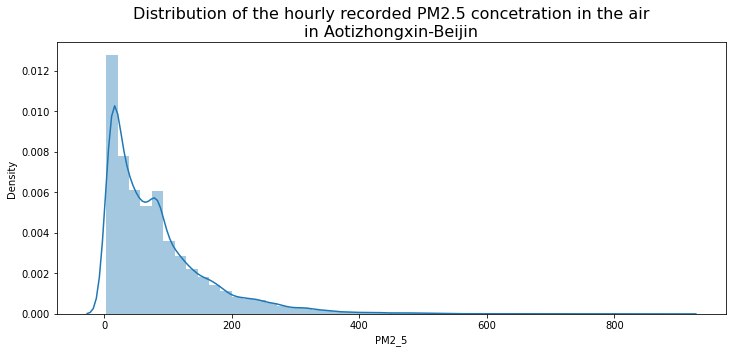

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(data_frame.PM2_5,bins=50)
plt.title('Distribution of the hourly recorded PM2.5 concetration in the air\nin Aotizhongxin-Beijin',
          fontsize=16)
plt.show()

<h5><b>what pattern does the amount of PM2.5 concentration in the air recorded in an hour follow
        for a daily time period ?</b></h5>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

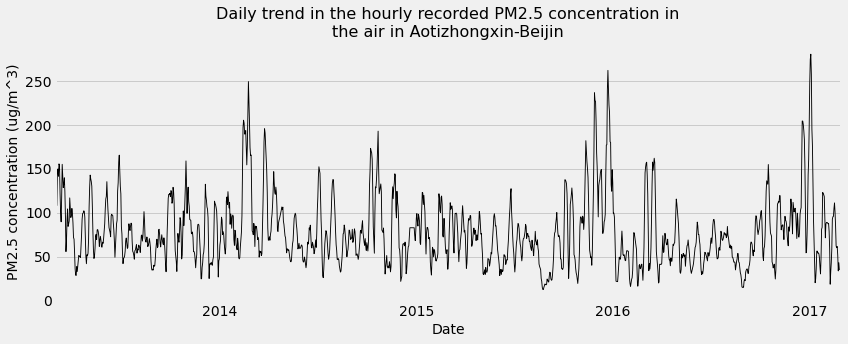

In [ ]:
# find the daily average of PM2.5 contained in the air in any given hour
daily_data = data_frame[['Date','PM2_5']]
daily_data = daily_data.set_index('Date')
daily_data = daily_data.resample('D').median()
decomposition = seasonal_decompose(daily_data,model='addictive')

# plot the data
with plt.style.context('fivethirtyeight'):
    decomposition.trend.plot(figsize=(12,5),style='k-',linewidth=.9,legend=False)
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Daily trend in the hourly recorded PM2.5 concentration in\nthe air in Aotizhongxin-Beijin',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

<h5><b>In which month does the amount of PM2.5 contained in the air rises ?</b></h5>

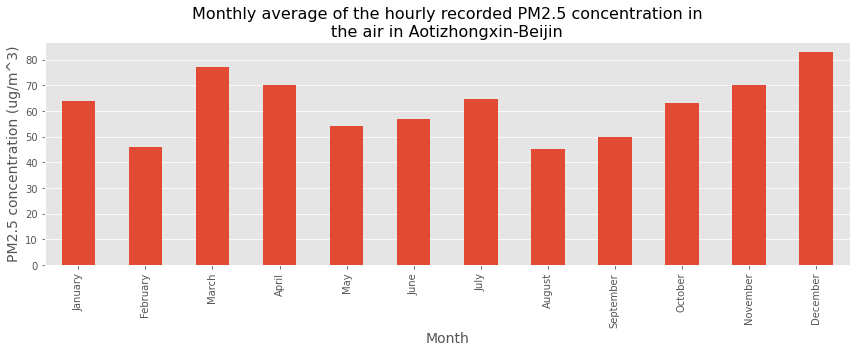

In [ ]:
monthly_data = data_frame[['month','PM2_5']]
months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']
ordered_monthdf = pd.DataFrame(months,columns=['month'])
map_dict = {}
for i,j in enumerate(months):
    map_dict.setdefault(i+1,j)

monthly_data.month = monthly_data.month.map(map_dict)
monthly_average = monthly_data.groupby('month').median()
monthly_average = pd.merge(ordered_monthdf,monthly_average,left_on='month',right_index=True)
monthly_average = np.round(monthly_average,1)
monthly_average = monthly_average.set_index('month')

# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Aotizhongxin-Beijin',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

<h5><b>At what time of the day do we expect the amount of PM2.5 concentration in the air to be high ?</b></h5>

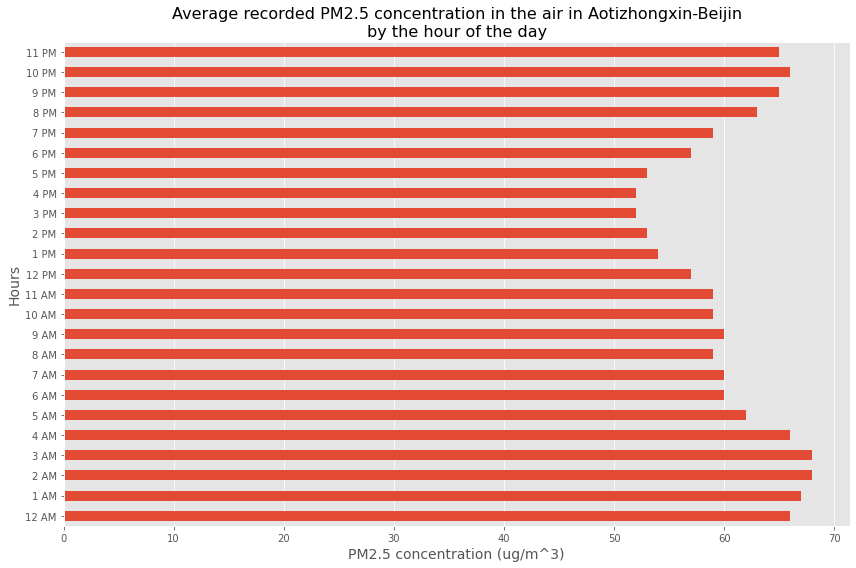

In [ ]:
hourly_data = data_frame[['hour','PM2_5']]
hrs = ['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM',
      '11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM',
      '8 PM','9 PM','10 PM','11 PM']
hour_dict = {}
for i,j in enumerate(hrs):
    hour_dict.setdefault(i,j)
    
hourly_data = hourly_data.groupby('hour').median().reset_index()
hourly_data.hour = hourly_data.hour.map(hour_dict)
hourly_data = hourly_data.set_index('hour')

# plot the data
with plt.style.context('ggplot'):
    hourly_data.plot(figsize=(12,8),legend=False,kind='barh',linewidth=.9)
    plt.ylabel('Hours',fontsize=14)
    plt.xlabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Average recorded PM2.5 concentration in the air in Aotizhongxin-Beijin\nby the hour of the day',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

<h5><b>In which direction does polluted air/wind mostly move ?</b></h5>

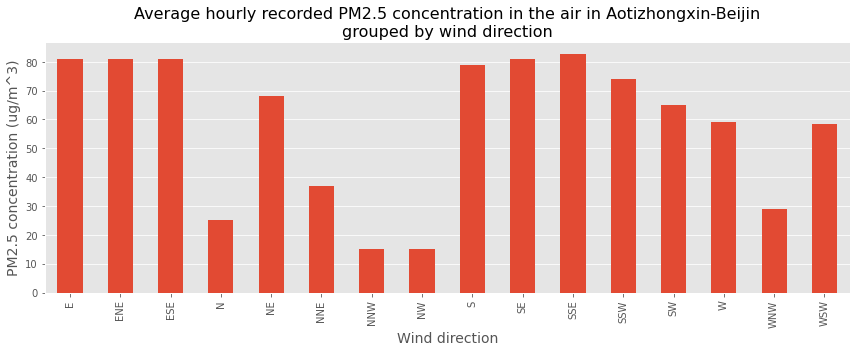

In [ ]:
wind_dir = data_frame[['wd','PM2_5']]
wind_dir = wind_dir.groupby('wd').median()

# plot the data
with plt.style.context('ggplot'):
    wind_dir.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Wind direction',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Average hourly recorded PM2.5 concentration in the air in Aotizhongxin-Beijin\ngrouped by wind direction',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

<h5><b>How do the other environmental factors affect the amount of PM2.5 concentration in the air ?</b></h5>

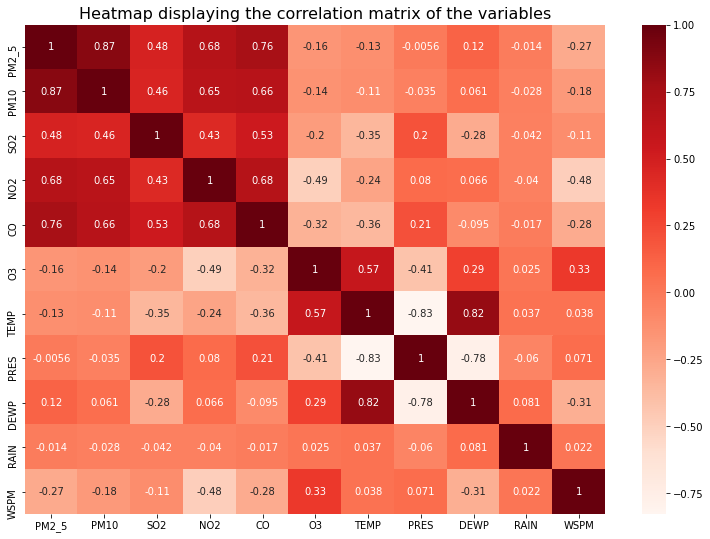

In [ ]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data_frame[['PM2_5', 'PM10', 'SO2', 'NO2',
                         'CO', 'O3', 'TEMP', 'PRES',
                         'DEWP', 'RAIN', 'WSPM']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

# Testing

In [ ]:
data_frame.head()

,Date,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
data_frame[['PM10']]

,PM10
0,4.0
1,8.0
2,7.0
3,6.0
4,3.0
...,...
35059,29.0
35060,37.0
35061,37.0
35062,44.0


In [ ]:
data_frame[['PM2_5']]

,PM2_5
0,4.0
1,8.0
2,7.0
3,6.0
4,3.0
...,...
35059,12.0
35060,13.0
35061,16.0
35062,21.0


In [ ]:
data_frame[:5]

,Date,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
new_df = data_frame

In [ ]:
new_df = new_df.set_index('Date',drop=True, append=False, inplace=False, verify_integrity=False)

In [ ]:
new_df[:5]

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Date,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
# convert frequency to weeks
df_wk =  new_df['PM10'].resample('W').mean() #change da column to whatever you need to resample
print('week frequency shape:', df_wk.shape) 
print('PM10 missing values:', df_wk.isna().sum()) #since we are already resampling the data with pm10 column there is no need to mention the column nmae here same apply for every other column

week frequency shape: (210,)
PM10 missing values: 0


In [ ]:
# convert frequency to weeks
df_wk =  new_df['PM2_5'].resample('W').mean() #change da column to whatever you need to resample
print('week frequency shape:', df_wk.shape) 
print('PM2.5 missing values:', df_wk.isna().sum()) #since we are already resampling the data with pm10 column there is no need to mention the column nmae here same apply for every other column

week frequency shape: (210,)
PM2.5 missing values: 0


# Trends and repeating variations.

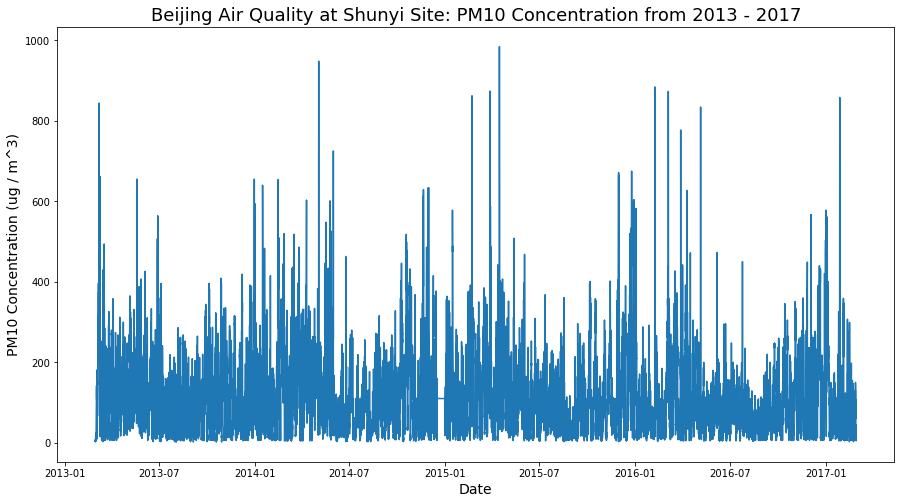

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(new_df.PM10)
plt.title('Beijing Air Quality at Shunyi Site: PM10 Concentration from 2013 - 2017', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration (ug / m^3)', fontsize=14);

## Observations:

There are no obvious patterns in the PM10 time series plot.

There does not appear to be a general trend increasing or decreasing.

There may be seasonal variation. There is a slight sinusoidal rising and falling of values that traces across the years.

Most of the movement seems random. As an example, the peaks at the start of first quarter in 2016 and 2017 are not found in earlier years.

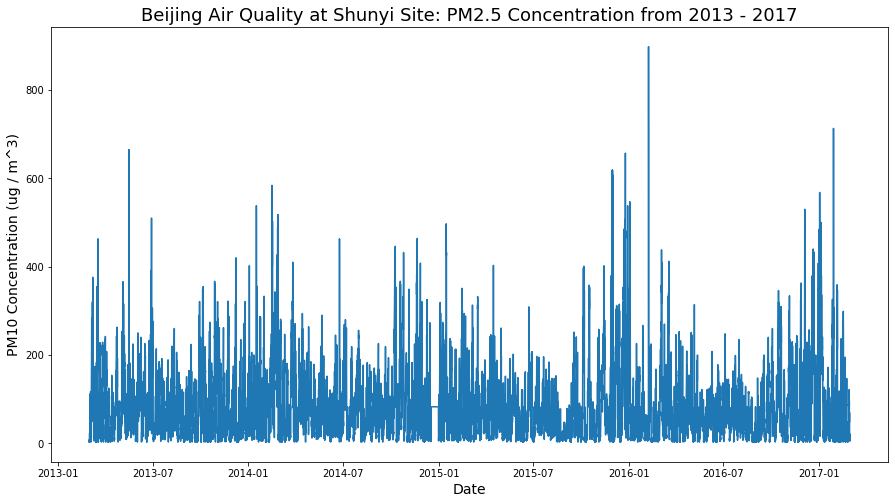

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(new_df.PM2_5)
plt.title('Beijing Air Quality at Shunyi Site: PM2.5 Concentration from 2013 - 2017', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration (ug / m^3)', fontsize=14);

## Observations:

There are some observed patterns in the PM2.5 time series plot.

There does not appear to be a general trend increasing or decreasing but it may be like a sinusoidal wave.

There may be seasonal variation. There is a slight sinusoidal rising and falling of values that traces across the years corresponding to its quarters.

Most of the movement seems to be random. As an example, the peaks at the start of first quarter in 2016 and 2017 are a little downward trend when compared with previous year 2016 ( on first quarter ).

# Observations:

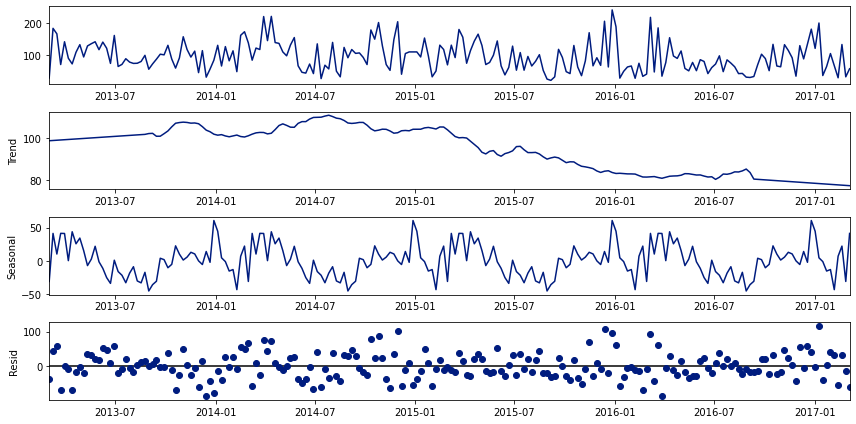

In [ ]:
# time series decomposition
import statsmodels.api as sm
plt.style.use('seaborn-dark-palette')
plt.rcParams['figure.figsize'] = (12, 6)
data1 = data_frame[['Date','PM10']]
data1 = data1.set_index('Date')
data1 = data1.resample('W').median()
decomposition = seasonal_decompose(data1,model='addictive', extrapolate_trend='freq')

fig = decomposition.plot()


## Observations

The Observed plot shows the average weekly PM10 values.

The Trend plot indicates that there is an overall decreasing trend. The dataset starts at values around 95 and (after increasing in 2014) ends just below 90.

The Seasonal plot identifies repeating patterns that reach their lowest value about 60% of the way through each year. The maximum values are near the start of each year.

The Residual plot reflects the remaining noise in the dataset after removing the other variation types. There are no patterns present.

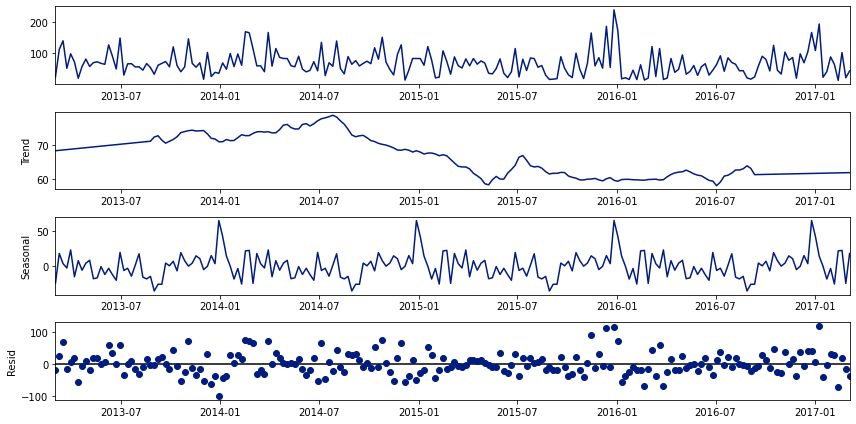

In [ ]:
# time series decomposition
import statsmodels.api as sm
plt.style.use('seaborn-dark-palette')
plt.rcParams['figure.figsize'] = (12, 6)
data1 = data_frame[['Date','PM2_5']]
data1 = data1.set_index('Date')
data1 = data1.resample('W').median()
decomposition = seasonal_decompose(data1,model='addictive', extrapolate_trend='freq')

fig = decomposition.plot()


## Observations

The Observed plot shows the average weekly PM2.5 values.

The Trend plot indicates that there is an overall decreasing trend. The dataset starts at values around 95 and (after increasing in 2014) ends just below 90.

The Seasonal plot identifies repeating patterns that reach their lowest value about 60% of the way through each year. The maximum values are near the start of each year.

The Residual plot reflects the remaining noise in the dataset after removing the other variation types. There are no patterns present.

# Series stationarity.

In [ ]:
# augmented dickey-fuller test
from statsmodels.tsa.stattools import adfuller

df_aft = adfuller(data_frame.PM10, autolag='AIC')
output = pd.Series(df_aft[0:4], index=['test statistic', 'pvalue', 'number of lags used', 'number of observations'])
output

test statistic              -18.918147
pvalue                        0.000000
number of lags used          51.000000
number of observations    35012.000000
dtype: float64

In [ ]:
# augmented dickey-fuller test
from statsmodels.tsa.stattools import adfuller

df_aft = adfuller(data_frame.PM2_5, autolag='AIC')
output = pd.Series(df_aft[0:4], index=['test statistic', 'pvalue', 'number of lags used', 'number of observations'])
output

test statistic              -19.210436
pvalue                        0.000000
number of lags used          51.000000
number of observations    35012.000000
dtype: float64

# Training and testing sets

In [ ]:
# train-test split
pct_train = 0.80
split_wk_idx = round(len(data_frame) * pct_train)
train_wk, test_wk = data_frame[:split_wk_idx], data_frame[split_wk_idx:]

In [ ]:
test_wk[:5]


,Date,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
28051,2016-05-12 19:00:00,28052,2016,5,12,19,10.0,36.0,2.0,18.0,300.0,89.0,20.3,1011.7,-5.6,0.0,NNW,2.2,Aotizhongxin
28052,2016-05-12 20:00:00,28053,2016,5,12,20,26.0,52.0,2.0,30.0,400.0,66.0,17.4,1012.6,0.1,0.0,NNW,0.6,Aotizhongxin
28053,2016-05-12 21:00:00,28054,2016,5,12,21,11.0,77.0,2.0,47.0,500.0,34.0,14.7,1013.8,1.6,0.0,SW,0.5,Aotizhongxin
28054,2016-05-12 22:00:00,28055,2016,5,12,22,22.0,126.0,3.0,63.0,800.0,2.0,12.8,1014.4,2.6,0.0,NE,0.0,Aotizhongxin
28055,2016-05-12 23:00:00,28056,2016,5,12,23,31.0,118.0,3.0,60.0,800.0,2.0,11.2,1014.6,4.6,0.0,WNW,0.4,Aotizhongxin


# Correlation coefficients.

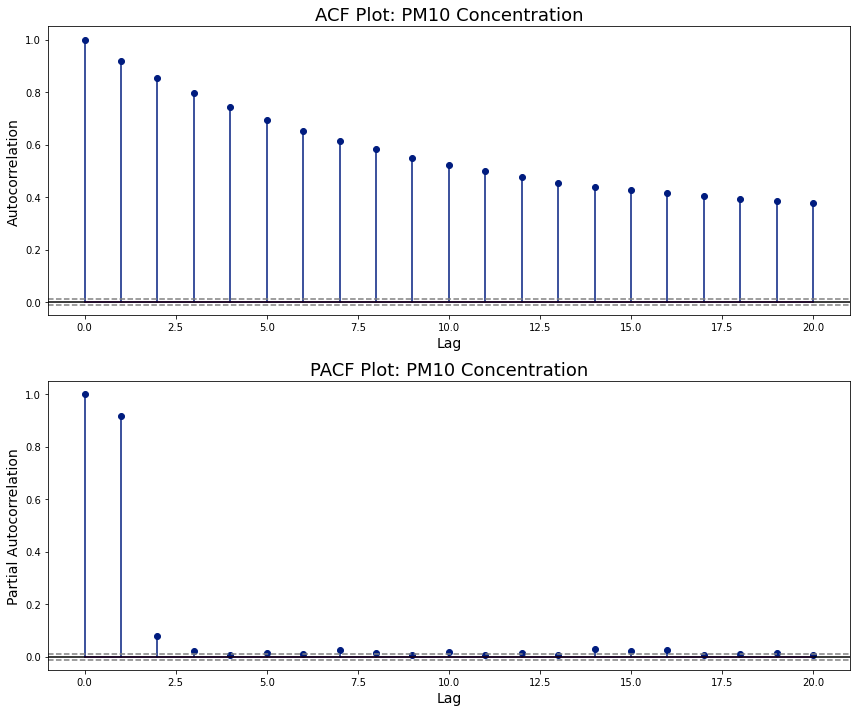

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# ACF
lag_acf = acf(train_wk.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.title('ACF Plot: PM10 Concentration', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)

# PACF
lag_pacf = pacf(train_wk.PM10, nlags=20, method='ols')

plt.subplot(212)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.title('PACF Plot: PM10 Concentration', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)

plt.tight_layout();

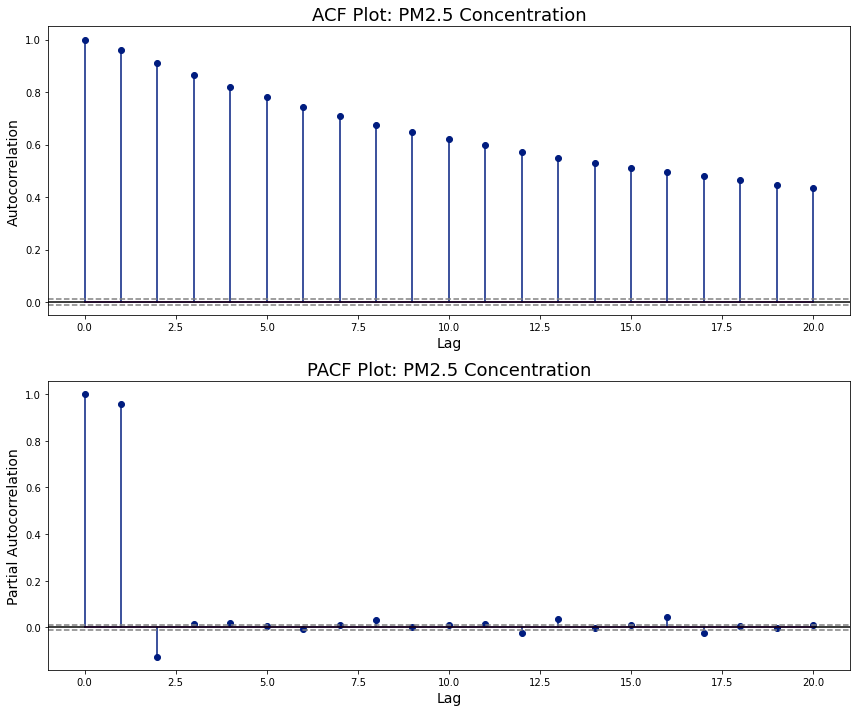

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# ACF
lag_acf = acf(train_wk.PM2_5, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.title('ACF Plot: PM2.5 Concentration', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)

# PACF
lag_pacf = pacf(train_wk.PM2_5, nlags=20, method='ols')

plt.subplot(212)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.title('PACF Plot: PM2.5 Concentration', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)

plt.tight_layout();

# ARIMA

In [ ]:
# fit ARIMA model
import pmdarima as pm

fit_wk = pm.auto_arima(train_wk.PM10, start_p=0, d=1, start_q=0, max_p=6, max_d=6, max_q=6, 
                             start_P=0, D=1, start_Q=0, max_P=6, max_D=6, max_Q=6, seasonal=False, m=52, trace=True,
                             error_action='ignore', suppress_warnings=True, stepwise=True)  

fit_wk.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=285124.925, Time=0.93 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=284738.028, Time=1.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=284693.712, Time=3.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=285122.925, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=29.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=284621.453, Time=4.84 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=35.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=284566.672, Time=7.72 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=56.60 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=284482.131, Time=8.19 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=59.83 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=284405.204, Time=12.13 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=72.24 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=284284.499, Time=12.12 sec
 ARIMA(1,1,6)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                28051
Model:               SARIMAX(0, 1, 6)   Log Likelihood             -142134.249
Date:                Mon, 03 May 2021   AIC                         284282.499
Time:                        12:36:06   BIC                         284340.191
Sample:                             0   HQIC                        284301.069
                              - 28051                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1427      0.001    -96.991      0.000      -0.146      -0.140
ma.L2         -0.0619      0.002    -40.357      0.000      -0.065      -0.059
ma.L3         -0.0517      0.002    -23.363      0.000      -0.056      -0.047
ma.L4         -0.0585      0.003    -17.700      0.000      -0.065      -0.052
ma.L5         -0.0522      0.004    -14.773      0.000      -0.059      -0.045
ma.L6         -0.0687      0.003    -22.427      0.000      -0.075      -0.063
sigma2      1474.6344      2.795    527.504      0.000    1469.155    1480.113
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):           4074121.05
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# fit ARIMA model
import pmdarima as pm

fit_wk = pm.auto_arima(train_wk.PM2_5, start_p=0, d=1, start_q=0, max_p=6, max_d=6, max_q=6, 
                             start_P=0, D=1, start_Q=0, max_P=6, max_D=6,seasonal=False, max_Q=6, m=52, trace=True,
                             error_action='ignore', suppress_warnings=True, stepwise=True)  

fit_wk.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=255459.961, Time=0.85 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=255167.945, Time=1.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=255147.764, Time=2.86 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=255457.961, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=255141.220, Time=9.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=39.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=49.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=255134.648, Time=7.57 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=255084.836, Time=5.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=55.88 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=255037.588, Time=6.01 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=62.84 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=255023.631, Time=7.23 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=71.17 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                28051
Model:               SARIMAX(0, 1, 6)   Log Likelihood             -127492.389
Date:                Mon, 03 May 2021   AIC                         254998.777
Time:                        12:58:14   BIC                         255056.470
Sample:                             0   HQIC                        255017.348
                              - 28051                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0980      0.001     81.414      0.000       0.096       0.100
ma.L2         -0.0357      0.002    -22.990      0.000      -0.039      -0.033
ma.L3         -0.0559      0.003    -19.151      0.000      -0.062      -0.050
ma.L4         -0.0501      0.003    -16.539      0.000      -0.056      -0.044
ma.L5         -0.0282      0.003    -10.410      0.000      -0.034      -0.023
ma.L6         -0.0316      0.003    -11.991      0.000      -0.037      -0.026
sigma2       519.3496      0.738    703.501      0.000     517.903     520.796
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):          10004237.76
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        95.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediction

AttributeError: ignored

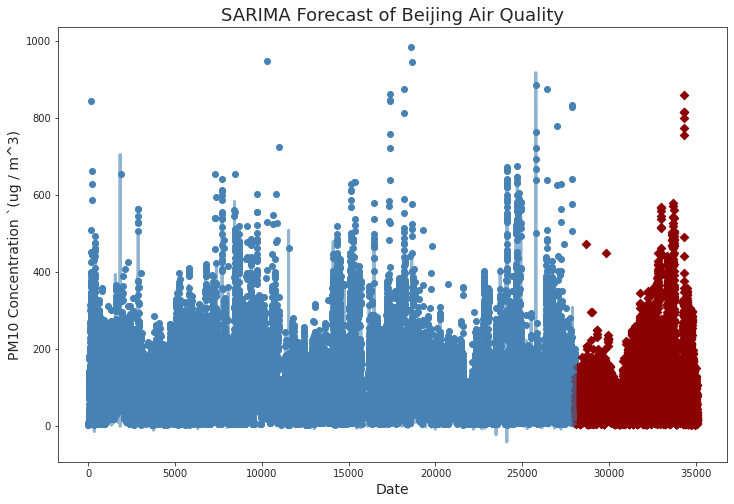

In [ ]:
# prediction plot
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_wk.index, train_wk.PM10, color='steelblue', marker='o')
plt.plot(train_wk.index, fit_wk.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test, ci_test = fit_wk.predict(n_periods=test_wk.shape[0], return_conf_int=True)
ci_lower = pd.Series(ci_test[:, 0], index=test_wk.index)
ci_upper = pd.Series(ci_test[:, 1], index=test_wk.index)
plt.scatter(test_wk.index, test_wk.PM10, color='darkred', marker='D')
plt.plot(test_wk.index, fit_wk.predict(n_periods=test_wk.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(ug / m^3)', fontsize=14)
plt.axvline(x=df_wk.PM10.index[[split_wk_idx]], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower.index, ci_lower, ci_upper, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

AttributeError: ignored

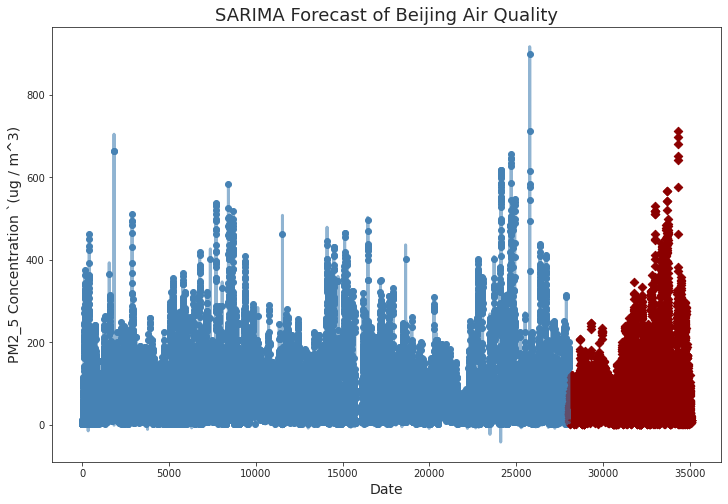

In [ ]:
# prediction plot
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_wk.index, train_wk.PM2_5, color='steelblue', marker='o')
plt.plot(train_wk.index, fit_wk.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test, ci_test = fit_wk.predict(n_periods=test_wk.shape[0], return_conf_int=True)
ci_lower = pd.Series(ci_test[:, 0], index=test_wk.index)
ci_upper = pd.Series(ci_test[:, 1], index=test_wk.index)
plt.scatter(test_wk.index, test_wk.PM2_5, color='darkred', marker='D')
plt.plot(test_wk.index, fit_wk.predict(n_periods=test_wk.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM2_5 Concentration `(ug / m^3)', fontsize=14)
plt.axvline(x=df_wk.PM2_5.index[split_wk_idx], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower.index, ci_lower, ci_upper, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

# Acuracy Metrics

In [ ]:
# root mean square error 
from sklearn.metrics import mean_squared_error

print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_wk.PM10, fit_wk.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_wk.PM10, fit_wk.predict(n_periods=test_wk.shape[0]))))


Training RMSE: 63.23
Testing RMSE: 121.05


In [ ]:
# root mean square error 
from sklearn.metrics import mean_squared_error

print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_wk.PM2_5, fit_wk.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_wk.PM2_5, fit_wk.predict(n_periods=test_wk.shape[0]))))


Training RMSE: 22.79
Testing RMSE: 109.06
